Importing clean data and setting up pandas dataset of event 1

In [ ]:
from google.colab import files
uploaded = files.upload()  # file uploaded

Saving event_1.zip to event_1.zip


In [ ]:
import zipfile
import pandas as pd

# Path to zip file
zip_path = "event_1.zip"

# Open the zip file
with zipfile.ZipFile(zip_path, 'r') as z:
    # List and sort the file names
    csv_files = sorted([f for f in z.namelist() if f.endswith('.csv')])

    # Read them in order and collect as DataFrames
    dfs_event_1 = [pd.read_csv(z.open(f)) for f in csv_files]

# Concatenate all DataFrames
event_1 = pd.concat(dfs_event_1, ignore_index=True)
event_1


,evID,timestamp,enHad,enVis,enNeu,muMom,posX,posZ,driftDist,clLength,posY,amplRec
0,9.190098e+09,1.247167e+12,16.5,439.7,16.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,297.12,-359.62,1.37,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,299.22,-355.98,0.61,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,302.32,-351.92,1.44,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,300.22,-348.28,1.75,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-398.84,NaN,NaN,-142.50,11.43
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-398.84,NaN,NaN,-160.98,4.82
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-385.44,NaN,NaN,-152.88,2.48
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-385.44,NaN,NaN,-144.96,26.97


In [ ]:
#headers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
import hdbscan

nearest neighbor, dbscan, hdbscan , pca function construction

In [ ]:
#getting the eps value for dbscan by checking the distance between neighbouring values
def get_nearestneighbor(x,y) :
 k =x
 nbrs = NearestNeighbors(n_neighbors=k).fit(y)
 distances, _ = nbrs.kneighbors()

 distances = np.sort(distances[:, k-1])
 plt.plot(distances)
 plt.ylabel(f'{k}th Nearest Neighbor Distance')
 plt.xlabel('Points sorted by distance')
 plt.show()



In [ ]:
def get_hdbscan_clusters(x,y,z):
 clusterer = hdbscan.HDBSCAN(min_cluster_size=x,min_samples=y, metric='euclidean')
 labels = clusterer.fit_predict(z)
 probs  = clusterer.probabilities_
 outlier = clusterer.outlier_scores_

 print("Clusters found (excluding noise):", np.unique(labels))
 print("Noise fraction:", np.mean(labels == -1))
 plt.figure(figsize=(8, 8))
 for cluster in sorted(set(labels)):
    if cluster == -1:
        color = 'gray'
        label_txt = 'Noise'
    else:
        color = plt.get_cmap('tab10')(cluster % 10)
        label_txt = f'Cluster {cluster}'
    idx = (labels == cluster)
    plt.scatter(z[idx, 0], z[idx, 1],
                s=30,
                color=color,
                alpha=np.clip(probs[idx], 0.3, 1.0),
                label=label_txt)

 plt.xlabel('Feature 0')
 plt.ylabel('Feature 1')
 plt.title('HDBSCAN Clustering (Direct 2D)')
 plt.legend()
 plt.grid(True)
 plt.show()
 return labels



In [ ]:
def get_dbscan(x,y,z):
  db = DBSCAN(eps=x, min_samples=y)
  labels = db.fit_predict(z)
  print("Clusters found (excluding noise):", np.unique(labels))
  print("Noise fraction:", np.mean(labels == -1))
  return labels


In [ ]:
def get_pca_2d(x,labels):
# PCA for 3D plotting
    X_pca = PCA(n_components=2).fit_transform(x)

  # 2D scatter plot
    plt.figure(figsize=(8, 8))
    for cluster in sorted(set(labels)):
        if cluster == -1:
            color = 'black'
            label = 'Noise'
        else:
            color = plt.get_cmap('tab10')(cluster)
            label = f'Cluster {cluster}'
        idx = labels == cluster
        plt.scatter(X_pca[idx, 0], X_pca[idx, 1], color=color, label=label, s=10)

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('2D PCA with Clusters')
    plt.legend(title='Cluster')
    plt.show()



Top view (Target tracker)

In [ ]:
##taking the filtered and cleaned data
tau_hits = event_1[['posX','posZ', 'amplRec']]
tau_hits= tau_hits.dropna()
tau_hits_scaled = StandardScaler().fit_transform(tau_hits)
tau_hits_scaled.shape

(51, 3)

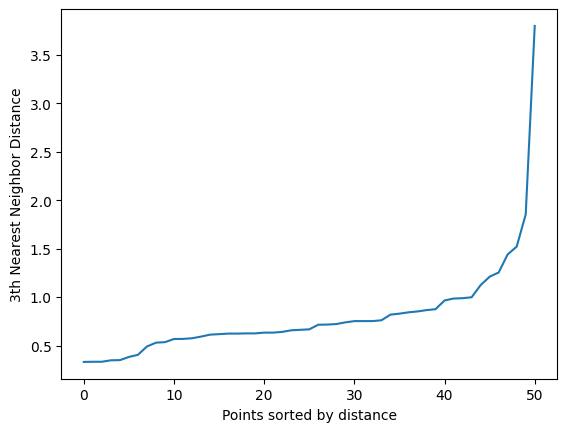

In [ ]:
get_nearestneighbor(3,tau_hits_scaled)#checking the epsilon value for dbscan and checking if the model is appropriate for this dataset

Clusters found (excluding noise): [-1  0  1]
Noise fraction: 0.2549019607843137


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


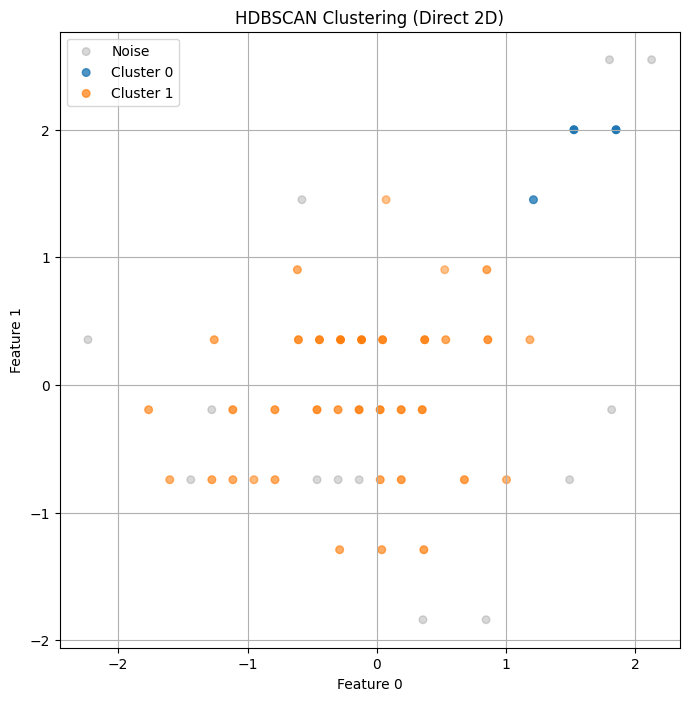

array([-1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  0,  0,  0, -1, -1])

In [ ]:
get_hdbscan_clusters(2,4,tau_hits_scaled)#hdbscan clustering

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Clusters found (excluding noise): [-1  0  1]
Noise fraction: 0.2549019607843137


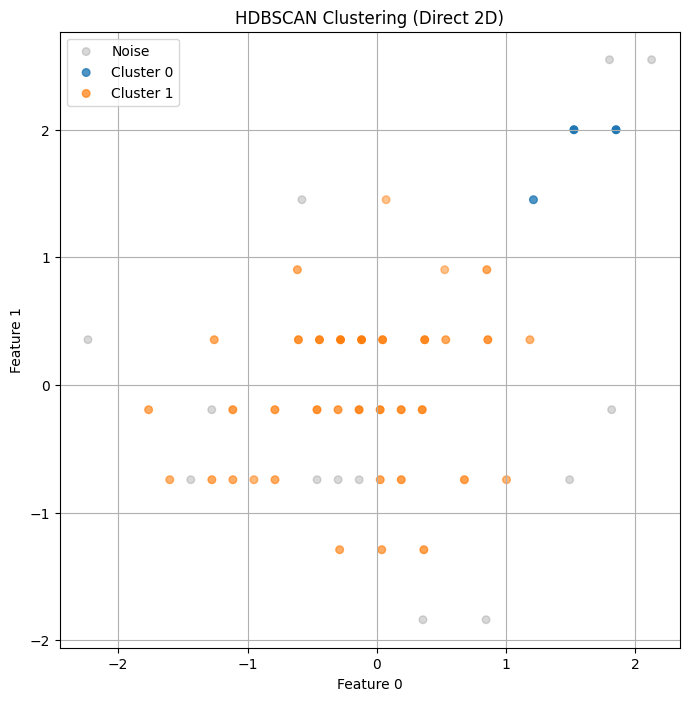

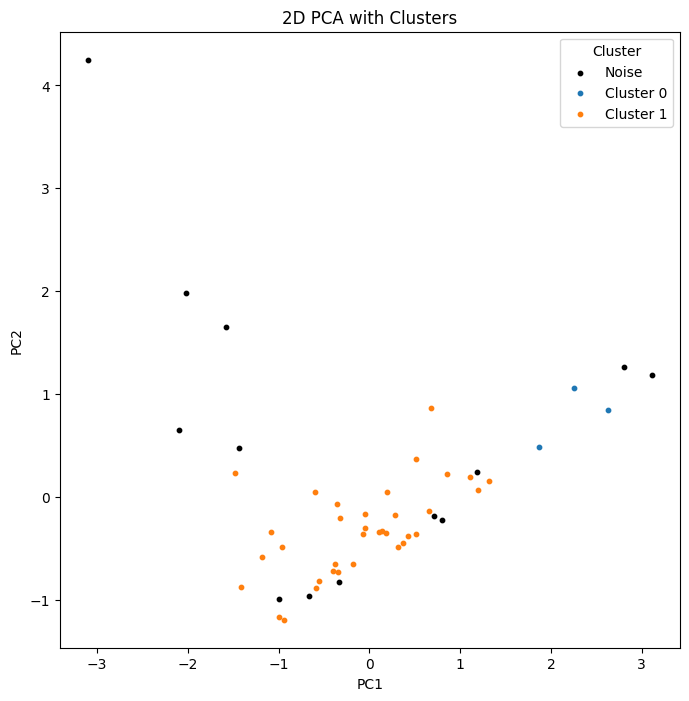

In [ ]:
# pca plot
labels = get_hdbscan_clusters(2,4,tau_hits_scaled)
get_pca_2d(tau_hits_scaled, labels)

side view target tracker

In [ ]:
tau_hits = event_1[['posY','posZ', 'amplRec']]
tau_hits= tau_hits.dropna()
tau_hits_scaled = StandardScaler().fit_transform(tau_hits)
tau_hits_scaled.shape

(46, 3)

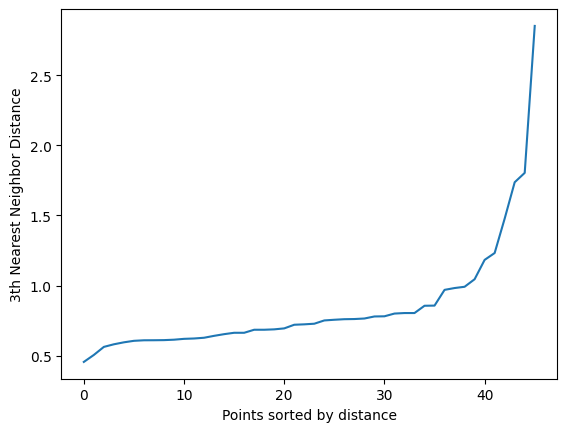

In [ ]:
get_nearestneighbor(3,tau_hits_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Clusters found (excluding noise): [-1  0  1]
Noise fraction: 0.5652173913043478


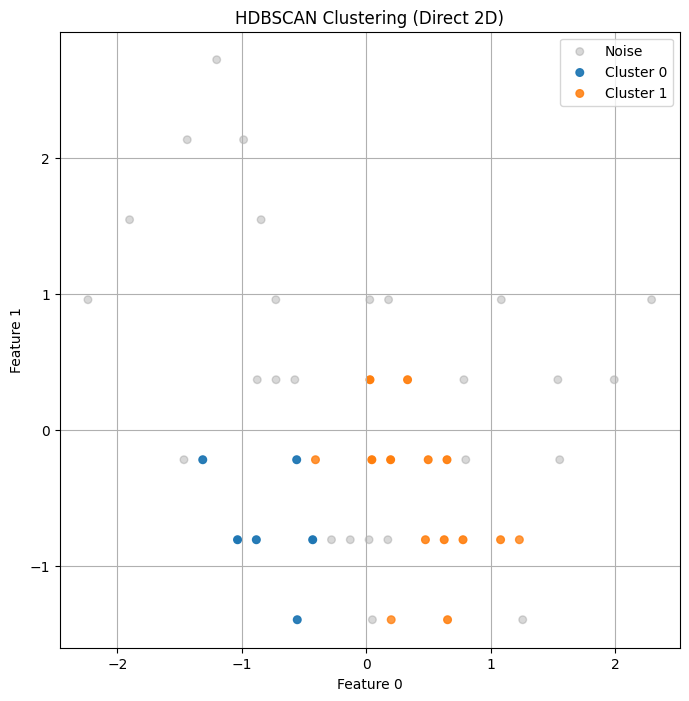

array([ 1,  0, -1,  1, -1,  1,  1,  1, -1, -1,  0,  0,  0, -1, -1,  1,  1,
        1,  1,  0,  0, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
get_hdbscan_clusters(2,4,tau_hits_scaled)

Clusters found (excluding noise): [-1  0  1]
Noise fraction: 0.5652173913043478


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


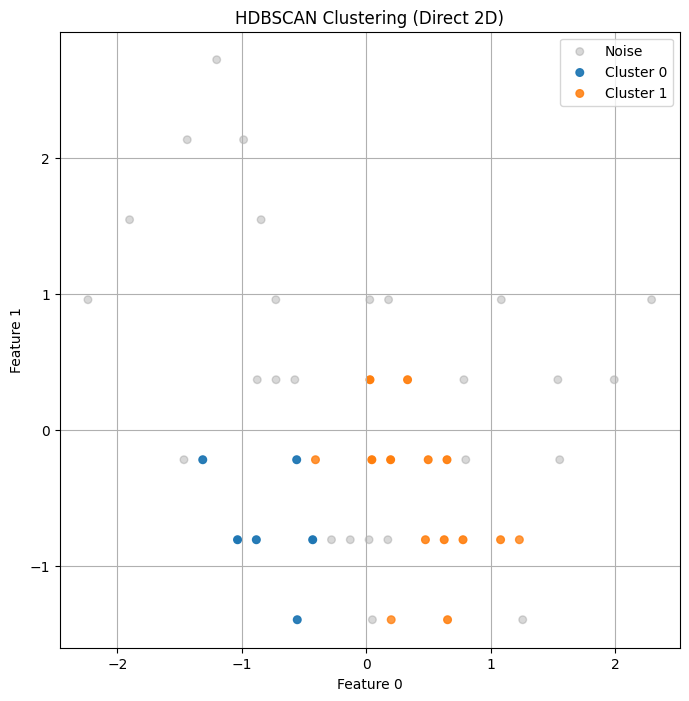

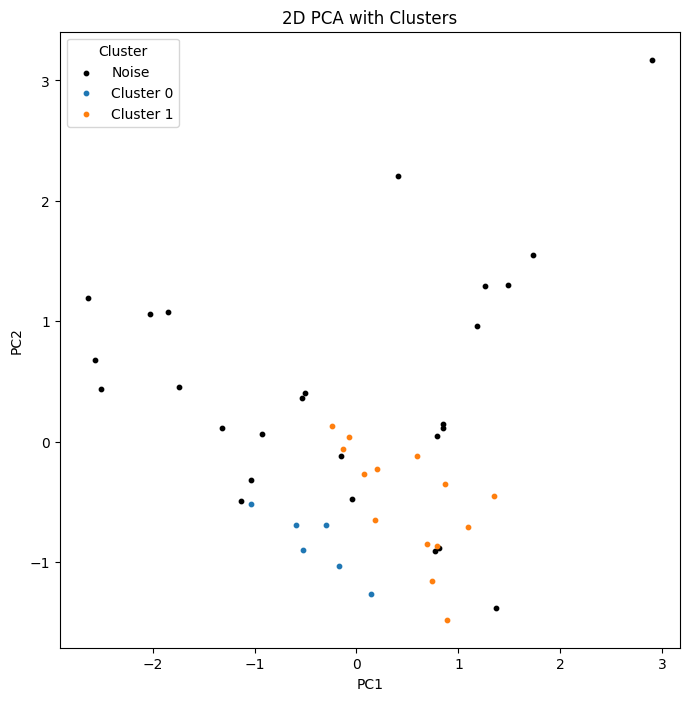

In [ ]:
labels = get_hdbscan_clusters(2,4,tau_hits_scaled)
get_pca_2d(tau_hits_scaled, labels)

The dataset is clustered based on the spatial distribution of hits, considering both the top view and the side view, after the neutrino interacts with the target and produces a hadronic shower.
The two clusters may correspond to different types of particles, but the electronic detector data alone is insufficient to unambiguously identify the particles or reconstruct their decay paths.

RPC HITS

In [ ]:
tau_hits = event_1[['posX','posZ', 'clLength']]
tau_hits= tau_hits.dropna()
tau_hits_scaled = StandardScaler().fit_transform(tau_hits)
tau_hits_scaled.shape

(1, 3)

Drift tube hits

In [ ]:
tau_hits = event_1[['posX','posZ', 'driftDist']]
tau_hits= tau_hits.dropna()
tau_hits_scaled = StandardScaler().fit_transform(tau_hits)
tau_hits_scaled.shape

(10, 3)

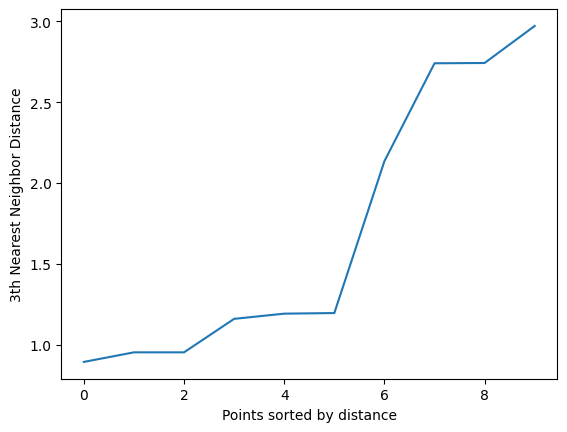

In [ ]:
get_nearestneighbor(3,tau_hits_scaled)

Clusters found (excluding noise): [-1  0]
Noise fraction: 0.4


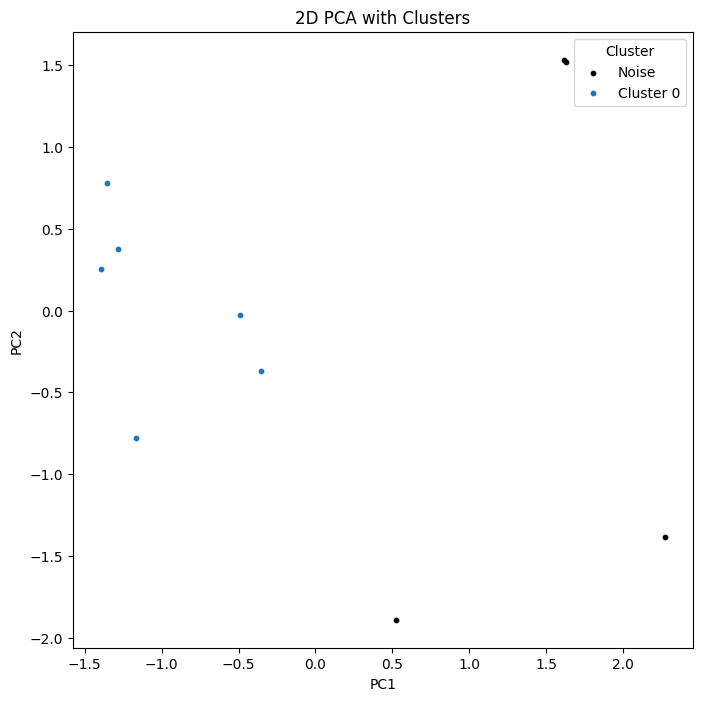

In [ ]:
labels = get_dbscan(1.3,4,tau_hits_scaled)
get_pca_2d(tau_hits_scaled, labels)

No muon bending in the drift tube is observed.